In [76]:
import pandas as pd
import numpy as np

In [77]:
superficie = pd.read_csv("/Users/antoinekrainc/Downloads/drive-download-20190227T071746Z-001/superficie.csv", header = None)
nombre_de_sdb = pd.read_csv("/Users/antoinekrainc/Downloads/drive-download-20190227T071746Z-001/nombre_de_sdb.csv", header= None)
nombre_de_chambres = pd.read_csv("/Users/antoinekrainc/Downloads/drive-download-20190227T071746Z-001/nombre_de_chambres.csv", header=None)
prices = pd.read_csv("/Users/antoinekrainc/Downloads/drive-download-20190227T071746Z-001/house_price.csv")





In [78]:
superficie = superficie.rename(columns={0:"id", 1:"superficie"})
nombre_de_sdb = nombre_de_sdb.rename(columns={0:"id", 1:"nombre_de_sdb"})
nombre_de_chambres = nombre_de_chambres.rename(columns={0:"id", 1:"nombre_de_chambres"})



In [79]:
nombre_de_sdb.head()

,id,nombre_de_sdb
0,0,2
1,1,1
2,2,1
3,3,3
4,4,1


In [80]:
pd.concat([superficie, nombre_de_sdb, nombre_de_chambres, prices], axis=1).head()

,id,superficie,id,nombre_de_sdb,id,nombre_de_chambres,Unnamed: 0,id,house_price
0,0,28844,0,2,0,1,0,14,1918154.0
1,1,27667,1,1,1,4,1,30,739142.0
2,2,14742,2,1,2,1,2,70,1621938.0
3,3,28089,3,3,3,4,3,77,1319862.0
4,4,11713,4,1,4,2,4,50,146250.0


In [81]:
dataset = superficie.merge(nombre_de_sdb, left_on="id", right_on="id").merge(nombre_de_chambres,on="id").merge(prices, on="id")
dataset.head()

,id,superficie,nombre_de_sdb,nombre_de_chambres,Unnamed: 0,house_price
0,0,28844,2,1,32,1421908.0
1,1,27667,1,4,71,1305091.0
2,2,14742,1,1,65,164373.0
3,3,28089,3,4,88,1441714.0
4,4,11713,1,2,49,108290.0


In [82]:
dataset = pd.concat([dataset.iloc[:, :-2], dataset.iloc[:,-1]], axis=1)

In [83]:
dataset.superficie.mean()

20439.77

In [84]:
dataset.groupby("nombre_de_chambres").mean()

,id,superficie,nombre_de_sdb,house_price
nombre_de_chambres,,,,
1,52.260870,22798.695652,1.869565,980774.869565
2,57.387097,19001.483871,2.000000,642086.258065
3,44.555556,19538.037037,2.037037,645904.592593
4,40.315789,21212.315789,1.894737,888045.631579


In [85]:
dataset.shape

(100, 5)

In [86]:
dataset.house_price.mean()

767747.87

In [87]:
dataset[dataset.loc[:,"nombre_de_chambres"]==1].std()

id                        28.196095
superficie              5387.422486
nombre_de_sdb              0.814881
nombre_de_chambres         0.000000
house_price           664318.109295
dtype: float64

In [88]:
dataset[dataset.loc[:,"nombre_de_chambres"]==1].mean()

id                        52.260870
superficie             22798.695652
nombre_de_sdb              1.869565
nombre_de_chambres         1.000000
house_price           980774.869565
dtype: float64

In [89]:
dataset[(dataset.house_price >dataset.house_price.quantile(.1)) & (dataset.house_price <dataset.house_price.quantile(.9))].groupby("nombre_de_chambres").mean()

,id,superficie,nombre_de_sdb,house_price
nombre_de_chambres,,,,
1,53.882353,22955.117647,1.823529,847546.117647
2,59.851852,19423.740741,1.925926,656395.000000
3,41.550000,20623.650000,2.050000,644955.400000
4,38.375000,20039.875000,2.000000,700004.437500


In [90]:
int(dataset.query("nombre_de_chambres == 1").quantile(0.9).house_price)

1965263

In [91]:
dataset.quantile(0.9)

id                         89.1
superficie              28235.0
nombre_de_sdb               3.0
nombre_de_chambres          4.0
house_price           1744842.7
Name: 0.9, dtype: float64

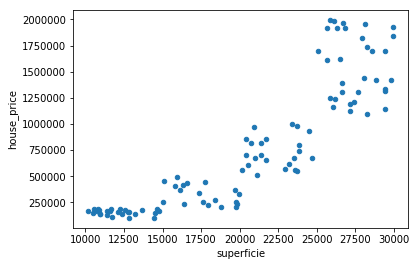

In [96]:
dataset.plot.scatter(x="superficie", y="house_price")

In [98]:
# Methode Lambda
dataset.superficie.apply(lambda x: "Très Grande" if x>25000 
                         else "Grande" if x>20000
                         else "Moyenne" if x>15000
                         else "Petite")

0     Très Grande
1     Très Grande
2          Petite
3     Très Grande
4          Petite
5     Très Grande
6         Moyenne
7     Très Grande
8         Moyenne
9          Petite
10    Très Grande
11         Grande
12    Très Grande
13         Petite
14    Très Grande
15         Petite
16         Grande
17    Très Grande
18        Moyenne
19         Grande
20         Grande
21        Moyenne
22         Petite
23         Petite
24    Très Grande
25         Petite
26        Moyenne
27         Petite
28    Très Grande
29         Grande
         ...     
70    Très Grande
71        Moyenne
72         Petite
73    Très Grande
74         Grande
75        Moyenne
76        Moyenne
77    Très Grande
78        Moyenne
79        Moyenne
80    Très Grande
81    Très Grande
82         Petite
83         Grande
84         Grande
85         Grande
86         Petite
87    Très Grande
88         Petite
89         Grande
90         Grande
91         Petite
92         Petite
93        Moyenne
94        

In [ ]:
dataset["superficie_cat"] = dataset.superficie
dataset.loc[dataset.superficie < 10000, "superficie_cat"] = "tres_petit"
dataset.loc[dataset.superficie.between(10000, 15000), "superficie_cat"] = "petit"
dataset.loc[dataset.superficie.between(15000, 20000), "superficie_cat"] = "moyen"
dataset.loc[dataset.superficie.between(20000, 25000), "superficie_cat"] = "grand"
dataset.loc[dataset.superficie > 25000, "superficie_cat"] = "tres_grand"

In [ ]:
data["sup_cat"] = "None"

for i in range(len(data.Superficie)):
    if float(data.Superficie[i]) < 10000:
            data.sup_cat[i] = "petite"
    elif float(data.Superficie[i]) > 10000 and float(data.Superficie[i]) <20000:
            data.sup_cat[i] = "moyenne"
    elif float(data.Superficie[i]) > 20000 and float(data.Superficie[i]) <25000:
            data.sup_cat[i] = "grande"
    else: 
            data.sup_cat[i] = "très grande"

In [99]:
labels = ["P","M","G","TG"]

dataset["categorie_superficie"] = pd.cut(dataset.superficie,
                                         [0,15000,20000,25000,100000], 
                                         right=False, 
                                         labels=labels)

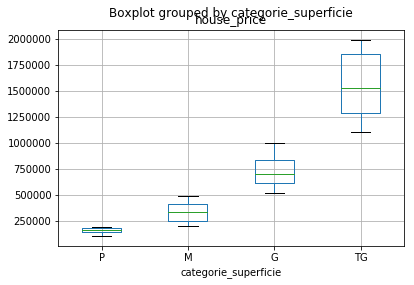

In [104]:
dataset.boxplot(column=["house_price"], by="categorie_superficie")

In [105]:
dataset.corr()

,id,superficie,nombre_de_sdb,nombre_de_chambres,house_price
id,1.000000,-0.114809,-0.046393,-0.181707,-0.152129
superficie,-0.114809,1.000000,0.009749,-0.076368,0.876803
nombre_de_sdb,-0.046393,0.009749,1.000000,0.020199,0.060142
nombre_de_chambres,-0.181707,-0.076368,0.020199,1.000000,-0.057291
house_price,-0.152129,0.876803,0.060142,-0.057291,1.000000
